
We will be exploring CIFA10 database in this notebook. 

The idea of this assignment is to refresh everything that we learnt about the network building concept so far and correct the below given model.  


In [0]:
#install Keras using python package-management system pip . 
# https://keras.io/
!pip install -q keras
import keras

Import all the required packages from keras. We use numpy for matrix operations, sequential models for linear stack of layers of the network.

For building the network, we will be using Convolution2D for convolution operation and Flatten for shaping the output of the Convolution2D operation to a one dimensional array

In [0]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils


Load pre-shuffled CIFAR10 data into train and test sets.  Let us load it into two different set of variables. ( for the base model and modified  network)


In [0]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

# (train_features2, train_labels2), (test_features2, test_labels) = cifar10.load_data()
# num_classes = len(np.unique(train_labels))

Let us display the 10 different classes that we want to predicit from the whole data set

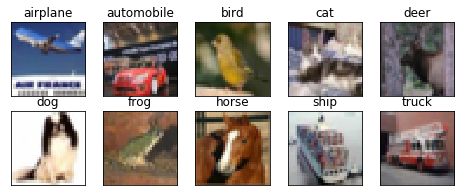

In [0]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

Utlity functions to plot the model history . i.e to display loss and accuracy for training and validatation stage.

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

Scale the image, and convert class labels to binary class labels.


Convert 1-dimensional class arrays to 10-dimensional class matrices


In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [0]:
# Define the model
model = Sequential()
model.add(Convolution2D(48, 3, 3, border_mode='same', input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(Convolution2D(48, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(96, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(96, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(192, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(192, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3))`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3))`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(192, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` 

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 48)        1344      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 48)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 48)        20784     
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 48)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 48)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 48)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 96)        41568     
__________

Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=100)`
  if sys.path[0] == '':


Epoch 1/100
390/390 [==============================] - 15s 39ms/step - loss: 1.8357 - acc: 0.2992 - val_loss: 1.4258 - val_acc: 0.4742
Epoch 2/100
390/390 [==============================] - 9s 23ms/step - loss: 1.3261 - acc: 0.5202 - val_loss: 1.1647 - val_acc: 0.5867
Epoch 3/100
390/390 [==============================] - 9s 22ms/step - loss: 1.1048 - acc: 0.6121 - val_loss: 0.9457 - val_acc: 0.6687
Epoch 4/100
390/390 [==============================] - 9s 22ms/step - loss: 0.9633 - acc: 0.6635 - val_loss: 0.8552 - val_acc: 0.7059
Epoch 5/100
390/390 [==============================] - 9s 22ms/step - loss: 0.8587 - acc: 0.7030 - val_loss: 0.7787 - val_acc: 0.7340
Epoch 6/100
390/390 [==============================] - 9s 22ms/step - loss: 0.7834 - acc: 0.7309 - val_loss: 0.7406 - val_acc: 0.7484
Epoch 7/100
390/390 [==============================] - 9s 22ms/step - loss: 0.7222 - acc: 0.7527 - val_loss: 0.6885 - val_acc: 0.7687
Epoch 8/100
390/390 [==============================] - 9s 22m

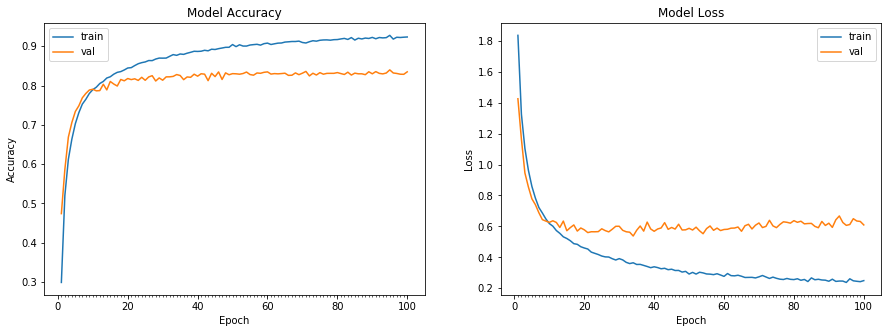

Accuracy on test data is: 83.48


In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 100, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Base model Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

In [0]:
(train_features2, train_labels2), (test_features2, test_labels2) = cifar10.load_data()
num_classes2 = len(np.unique(train_labels2))

In [0]:
train_features2 = train_features2.astype('float32')/255
test_features2 = test_features2.astype('float32')/255
# convert class labels to binary class labels
train_labels2 = np_utils.to_categorical(train_labels2, num_classes2)
test_labels2 = np_utils.to_categorical(test_labels2, num_classes2)

Set the learning rate. change it after 50 epchos

In [0]:
from keras.callbacks import LearningRateScheduler
from keras import regularizers

l2_reg_value=0.0001

def lr_schedule(epoch):
    lrate = 0.001
    if epoch > 40:
        lrate = 0.0005
    if epoch > 60:
        lrate = 0.0003
    if epoch > 80:
        lrate = 0.00001
    return lrate

###Build the network 

    Lets start building the network , 
At layer one, we are asking the network to build a layer with 32 of 3x3 kernel with 1 channel.


* Layer 1 : Add Convolution :  32 kernel of size 3x3, with border same

* Layer 2 :  Batch Normalization layer and Activation

* Layer 3 : Drop out 10%

* Layer 4 : Added Convolution :  64 kernel of size 3x3, with border same

* Layer 5 : Batch Normalization layer and Activation

* Layer 6 : Drop out of 20%

* Layer 7 : MaxPooling 

* Layer 8 : Add Convolution :  128 kernel of size 3x3

* Layer 9 : Batch Normalization layer followed by  Activation

* Layer 10:  Convolution to reduce the size  - 64 kernel  , 1 x 1

* Layer 11:  Batch Normalization layer

* Layer 12: Convolution  : 256,   3x3 

* Layer 13: Batch Normalization followed by Activation

* Layer 14: Dropout of 0.25

* Layer 15: Convolution  - 64 kernel  , 1 x 1 to reduce the channel size

* Layer 16: Batch Normalization layer and Acativation

* Layer 17: Convolution -    32, 3x3   with border same

* Layer 18: Convolution -    64, 3x3  

* Layer 19: Convolution -    128, 3x3  , activation, Batch 

* Layer 20:  Convolution -    64, 1x1 

* Layer 21:  Convolution -    256, 3x3

* Layer 22: Convolution -    10, 3x3

* Layer 23: Flatten the output 

* Layer 24:  Softmax activation layer.

In [0]:
model2 = Sequential()
# input block
model2.add(Convolution2D(32, 3, 3, border_mode='same', kernel_regularizer=regularizers.l2(l2_reg_value), input_shape=(32, 32, 3))) # 32
model2.add(BatchNormalization())
model2.add(Activation('relu'))
model.add(Dropout(0.1))

# C
model2.add(Convolution2D(64, 3, 3,border_mode='same', kernel_regularizer=regularizers.l2(l2_reg_value) ))#32 
model2.add(BatchNormalization())
model2.add(Activation('relu'))

# reduce the RF by half
model2.add(MaxPooling2D(pool_size=(2, 2))) #16
model.add(Dropout(0.2))


model2.add(Convolution2D(128, 3, 3, border_mode='same',kernel_regularizer=regularizers.l2(l2_reg_value))) #16
model2.add(BatchNormalization())
model2.add(Activation('relu'))
model2.add(Dropout(0.25))

#reduce the number of channel using 1x1
model2.add(Convolution2D(64, 1, 1, activation='relu',border_mode='same' ))  #16
model2.add(BatchNormalization())
model2.add(Activation('relu'))

model2.add(Convolution2D(256, 3, 3,kernel_regularizer=regularizers.l2(l2_reg_value))) #14
model2.add(BatchNormalization())
model2.add(Activation('relu'))
model2.add(Dropout(0.25))

model2.add(Convolution2D(64, 1, 1, activation='relu')) #14
model2.add(BatchNormalization())
model2.add(Activation('relu'))

model2.add(MaxPooling2D(pool_size=(2, 2)))   #7
model2.add(Dropout(0.25))

model2.add(Convolution2D(32, 3, 3, border_mode='same',kernel_regularizer=regularizers.l2(l2_reg_value))) # 7
model2.add(BatchNormalization())
model2.add(Activation('relu'))
model2.add(Dropout(0.3))

model2.add(Convolution2D(64, 3, 3,kernel_regularizer=regularizers.l2(l2_reg_value)))   # 5
model2.add(BatchNormalization())
model2.add(Activation('relu'))
model2.add(Dropout(0.4))

model2.add(Convolution2D(128, 3, 3,border_mode='same', kernel_regularizer=regularizers.l2(l2_reg_value)))# 3
model2.add(BatchNormalization())
model2.add(Activation('relu'))
model.add(Dropout(0.5))

model2.add(Convolution2D(64, 1, 1, activation='relu',border_mode='same' ))  #16
model2.add(BatchNormalization())
model2.add(Activation('relu'))

model2.add(Convolution2D(256, 3, 3, kernel_regularizer=regularizers.l2(l2_reg_value)))# 3
model2.add(BatchNormalization())
model2.add(Activation('relu'))

model2.add(Convolution2D(10, 3, 3,kernel_regularizer=regularizers.l2(l2_reg_value)))# 1
model2.add(Flatten())
model2.add(Activation('softmax'))

# Compile the model
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), kernel_regularizer=<keras.reg..., input_shape=(32, 32, 3..., padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), kernel_regularizer=<keras.reg..., padding="same")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), kernel_regularizer=<keras.reg..., padding="same")`
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (1, 1), activation="relu", padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, (3, 3), kernel_regularizer=<

In [0]:
model2.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_169 (Conv2D)          (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_148 (Bat (None, 32, 32, 32)        128       
_________________________________________________________________
activation_170 (Activation)  (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_170 (Conv2D)          (None, 32, 32, 64)        18496     
_________________________________________________________________
batch_normalization_149 (Bat (None, 32, 32, 64)        256       
_________________________________________________________________
activation_171 (Activation)  (None, 32, 32, 64)        0         
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 16, 16, 64)        0         
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., callbacks=[<keras.ca..., verbose=1, steps_per_epoch=390, epochs=100)`
  # This is added back by InteractiveShellApp.init_path()


Epoch 1/100

Epoch 00001: LearningRateScheduler setting learning rate to 0.001.
390/390 [==============================] - 28s 73ms/step - loss: 1.7444 - acc: 0.3779 - val_loss: 2.0645 - val_acc: 0.3553
Epoch 2/100

Epoch 00002: LearningRateScheduler setting learning rate to 0.001.
390/390 [==============================] - 18s 47ms/step - loss: 1.2600 - acc: 0.5678 - val_loss: 1.4372 - val_acc: 0.5348
Epoch 3/100

Epoch 00003: LearningRateScheduler setting learning rate to 0.001.
390/390 [==============================] - 18s 47ms/step - loss: 1.0421 - acc: 0.6519 - val_loss: 1.3364 - val_acc: 0.6021
Epoch 4/100

Epoch 00004: LearningRateScheduler setting learning rate to 0.001.
390/390 [==============================] - 18s 47ms/step - loss: 0.9224 - acc: 0.6992 - val_loss: 1.0064 - val_acc: 0.6804
Epoch 5/100

Epoch 00005: LearningRateScheduler setting learning rate to 0.001.
390/390 [==============================] - 18s 47ms/step - loss: 0.8465 - acc: 0.7285 - val_loss: 1.4413 - v

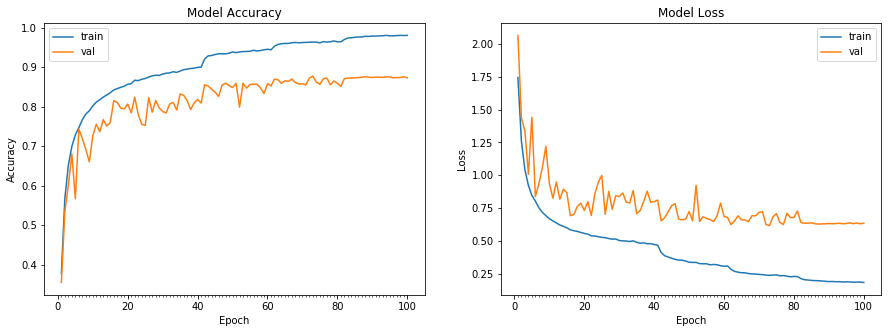

Accuracy on test data is: 87.29


In [0]:
datagen_1 = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)

# train the model
batch_size=128
start2 = time.time()
# Train the model
model2_info = model2.fit_generator(datagen_1.flow(train_features2, train_labels2, batch_size),
                                 samples_per_epoch = train_features2.shape[0], nb_epoch = 100, 
                                 validation_data = (test_features2, test_labels2),
                                 callbacks=[LearningRateScheduler(lr_schedule, verbose=1)], verbose=1)
end2 = time.time()
print ("Model took %0.2f seconds to train"%(end2 - start2))
# plot model history
plot_model_history(model2_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features2, test_labels2, model2))

Accuracy seems to be improved compared to the original model. ( Maximum it had gone up to 87.55) But, this might be due to number of kernels. I did try to increase the number of kernels, accuracy was slightly up, but the gap is similar. Not sure, why the gap between validation loss and training loss is a bit more comparable to the base model. 